In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("wine_fraud.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [5]:
df["type"].unique()

array(['red', 'white'], dtype=object)

In [6]:
df["quality"].unique()

array(['Legit', 'Fraud'], dtype=object)

<AxesSubplot:xlabel='quality', ylabel='count'>

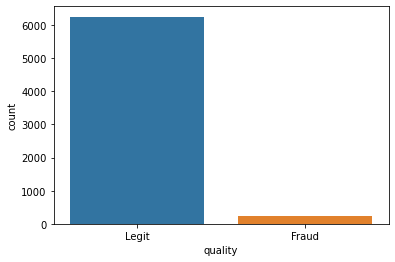

In [7]:
sns.countplot(x="quality", data=df)

<AxesSubplot:xlabel='type', ylabel='count'>

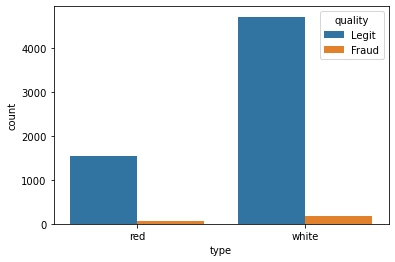

In [8]:
sns.countplot(x="type", data=df, hue="quality")

In [9]:
reds = df[df["type"]=="red"]

In [10]:
whites = df[df["type"]=="white"]

In [11]:
len(reds[reds["quality"]=="Fraud"])/len(reds)*100

3.9399624765478425

In [12]:
len(whites[whites["quality"]=="Fraud"])/len(whites)*100

3.7362188648427925

In [13]:
df["Fraud"] = df["quality"].map({"Legit":0, "Fraud":1})

In [14]:
df.corr()["Fraud"][:-1]

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Name: Fraud, dtype: float64

<AxesSubplot:>

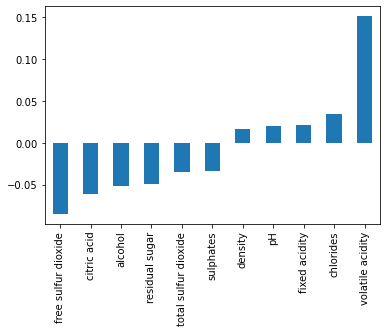

In [15]:
df.corr()["Fraud"][:-1].sort_values().plot(kind="bar")

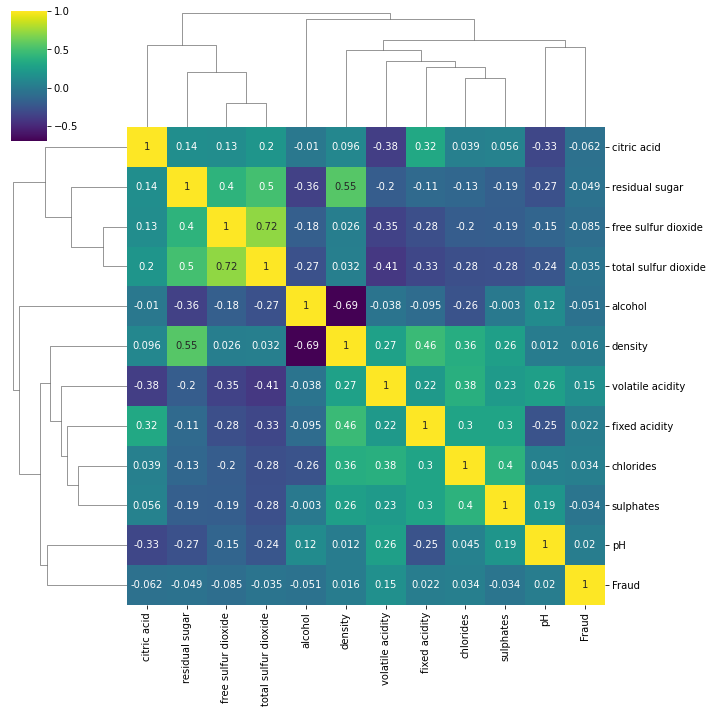

In [16]:
sns.clustermap(df.corr(), cmap="viridis", annot=True)

In [17]:
df = df.drop("Fraud", axis=1)

In [18]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [19]:
df["type"] = pd.get_dummies(df["type"], drop_first=True)

In [20]:
X = df.drop("quality", axis=1)

In [21]:
y = df["quality"]

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [25]:
from sklearn.svm import SVC

In [26]:
svc = SVC(class_weight="balanced")

In [27]:
from sklearn.model_selection import GridSearchCV 

In [28]:
param_grid = {"C":[0.001, 0.01, 0.1, 0.5, 1],
             "gamma":["scale", "auto"]}

In [29]:
grid = GridSearchCV(svc, param_grid)

In [30]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [31]:
grid.best_params_

{'C': 1, 'gamma': 'auto'}

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [33]:
grid_preds = grid.predict(scaled_X_test)

In [34]:
confusion_matrix(y_test, grid_preds)

array([[ 17,  10],
       [ 92, 531]], dtype=int64)

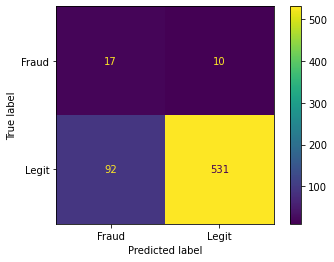

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test, grid_preds)

In [36]:
print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650

